Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[8.16017 154.839; 7.72781 154.876; … ; 7.51572 155.303; 7.36395 154.356]

Union{Missing, Float64}[7.41128 154.176; 8.0461 154.783; … ; 7.81115 154.444; 8.08591 154.05]

Union{Missing, Float64}[7.59188 154.698; 8.09331 154.805; … ; 7.70013 154.303; 7.07189 155.281]

Union{Missing, Float64}[7.68261 154.92; 7.72164 154.31; … ; 7.72343 154.564; 7.41314 154.85]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
         Mean        SD       Naive SE       MCSE     ESS
sigma   7.765152 0.29361308 0.0046424305 0.004885119 1000
   mu 154.603518 0.41164999 0.0065087579 0.005300222 1000

Quantiles:
          2.5%       25.0%       50.0%      75.0%      97.5%  
sigma   7.2163445   7.5629125   7.758795   7.958295   8.380125
   mu 153.8149750 154.3270000 154.600000 154.876250 155.429000



Plot the density of posterior draws

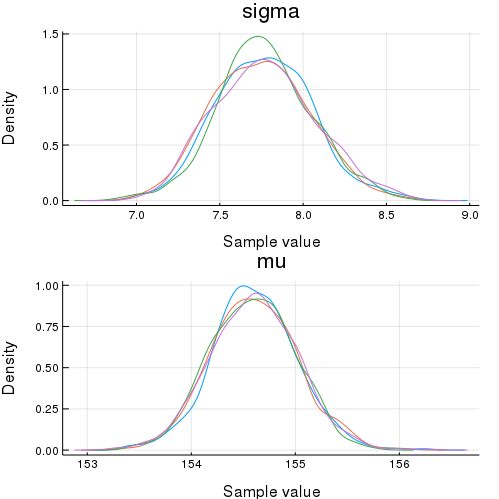

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.16524778890790817
 0.08326002786150148

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
  1.0         -0.00188707
 -0.00188707   1.0       

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*